# `ClimateTools.jl` and `ClimatePlots.jl`

[ClimateTools.jl](https://juliaclimate.github.io/ClimateTools.jl/dev/) is a collection of commonly-used tools aimed to ease the typical steps in (1) analyzing climate models outputs from netCDF files that follow CF-conventions and (2) creating climate scenarios. [ClimatePlots.jl](https://juliaclimate.github.io/ClimatePlots.jl/dev/) is the associated plotting library.

In [1]:
if false #set to true if you have not yet installed packages listed below
    using Pkg
    Pkg.add(PackageSpec(name="ClimateTools", rev="master"))

    Pkg.add("PyCall")
    ENV["PYTHON"]=""
    Pkg.build("PyCall")
    Pkg.add(PackageSpec(name="ClimatePlots", rev="master"))

    run(`wget http://esgf-data1.diasjp.net/thredds/fileServer/esg_dataroot/cmip5/output1/MIROC/MIROC5/piControl/day/atmos/day/r1i1p1/v20161012/tas/tas_day_MIROC5_piControl_r1i1p1_20000101-20091231.nc`)
    run(`mv tas_day_MIROC5_piControl_r1i1p1_20000101-20091231.nc ../inputs/`)
end

_Note: `tas_day_MIROC5_piControl_*.nc` was downloaded [here](http://esgf-data1.diasjp.net/thredds/fileServer/esg_dataroot/cmip5/output1/MIROC/MIROC5/piControl/day/atmos/day/r1i1p1/v20161012/tas/tas_day_MIROC5_piControl_r1i1p1_20000101-20091231.nc) by selecting `piControl,day,tas,MIROC5` in [the search engine](https://esgf-node.llnl.gov/search/cmip5/)_

```
project=CMIP5, model=MIROC5, Atmosphere and Ocean Research Institute (The University of Tokyo), 
experiment=pre-industrial control, time_frequency=day, modeling realm=atmos, ensemble=r1i1p1,
Description: MIROC5 model output prepared for CMIP5 pre-industrial control 
```

## Get Meta-Data From File

_Note: uncomment the final line to display the file meta data_

In [2]:
using ClimateTools, ClimatePlots

p="../inputs"
fil="$p/tas_day_MIROC5_piControl_r1i1p1_20000101-20091231.nc"
#fil="$p/clt_day_MIROC5_historical_r4i1p1_19500101-19591231.nc"
d=Dataset(fil);

## Read & Plot A Variable

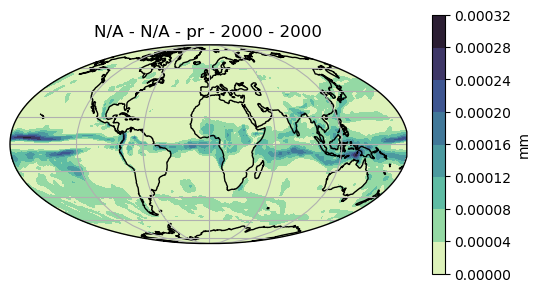

In [3]:
p1=joinpath(dirname(pathof(ClimateTools)),"../test/data")

#fil1="$p1/orog_fx_GFDL-ESM2G_historicalMisc_r0i0p0.nc"
fil1="$p1/sresa1b_ncar_ccsm3-example.nc"
model1 = load(fil1, "pr", data_units="mm")
contourf(model1, region = "Mollweide");

## Extract Subset And Plot Region

_Note : see `ClimatePlots.jl/src/maps_definition.jl`_

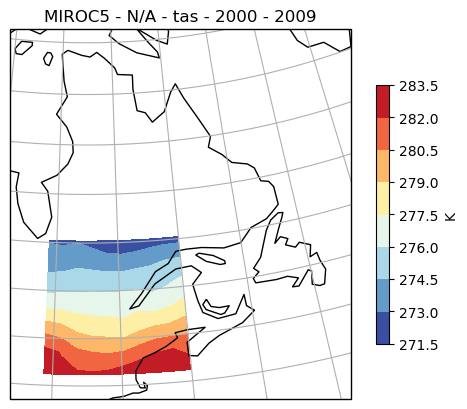

In [4]:
poly_reg = [[NaN -65 -80 -80 -65 -65];[NaN 42 42 52 52 42]]
model2 = load(fil, "tas", poly=poly_reg)
contourf(model2, region = "Quebec");

## Inspect Meta Data

In [5]:
#d
#model1
model2

ClimGrid struct with data:
   3-dimensional AxisArray{Float32,3,...} with axes:
    :lon, [-78.75, -77.34375, -75.9375, -74.53125, -73.125, -71.71875, -70.3125, -68.90625, -67.5, -66.09375]
    :lat, [42.723334864876975, 44.12409297135585, 45.52485010130229, 46.9256061546646, 48.32636101818818, 49.72711456310966, 51.12786664235329]
    :time, DateTimeNoLeap[DateTimeNoLeap(2000-01-01T12:00:00), DateTimeNoLeap(2000-01-02T12:00:00), DateTimeNoLeap(2000-01-03T12:00:00), DateTimeNoLeap(2000-01-04T12:00:00), DateTimeNoLeap(2000-01-05T12:00:00), DateTimeNoLeap(2000-01-06T12:00:00), DateTimeNoLeap(2000-01-07T12:00:00), DateTimeNoLeap(2000-01-08T12:00:00), DateTimeNoLeap(2000-01-09T12:00:00), DateTimeNoLeap(2000-01-10T12:00:00)  …  DateTimeNoLeap(2009-12-22T12:00:00), DateTimeNoLeap(2009-12-23T12:00:00), DateTimeNoLeap(2009-12-24T12:00:00), DateTimeNoLeap(2009-12-25T12:00:00), DateTimeNoLeap(2009-12-26T12:00:00), DateTimeNoLeap(2009-12-27T12:00:00), DateTimeNoLeap(2009-12-28T12:00:00), DateTime

## Read & Plot A Variable (bis)

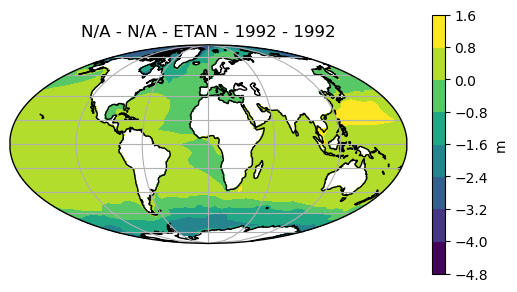

(true, PyObject <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7ff8d10ffb50>, PyObject <cartopy.crs.Mollweide object at 0x7ff8e0a68590>, PyObject <matplotlib.colorbar.Colorbar object at 0x7ff8c2450090>)

In [6]:
p3="../outputs/nctiles-newfiles/interp"
tst=sum(occursin.("ETAN.nc",readdir(p3)))>0
if tst
    model3 = load("$p3/ETAN.nc", "ETAN")
    contourf(model3, region = "Mollweide")
end